In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/philly.csv")
df.drop('Sunrise', inplace=True, axis=1)
df.drop('Sunset', inplace=True, axis=1)
df.drop('Sky Conditions', inplace=True, axis=1)
df.drop('Pressure Change', inplace=True, axis=1)
df.drop('Pressure Tendency', inplace=True, axis=1)
df['Precipitation'] = df["Precipitation"].fillna(0)
df.head()

,DATE,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Humidity,Station Pressure,Visibility,Wet Bulb Temp,Wind Direction,Wind Speed
0,01.01.2018 00:54,10.0,30.41,-5.0,0.0,50.0,30.38,10.00,7.0,300.0,6.0
1,01.01.2018 01:00,10.0,NaN,-5.0,0.0,50.0,30.35,9.94,7.0,300.0,6.0
2,01.01.2018 01:54,9.0,30.42,-5.0,0.0,52.0,30.39,10.00,7.0,320.0,7.0
3,01.01.2018 02:54,10.0,30.42,-6.0,0.0,48.0,30.39,10.00,7.0,310.0,8.0
4,01.01.2018 03:54,9.0,30.42,-6.0,0.0,50.0,30.39,10.00,6.0,310.0,7.0


In [4]:
df.count()

DATE                40590
Dry Bulb Temp       39447
Altitude            35099
Dew Point Temp      39445
Precipitation       40590
Humidity            39445
Station Pressure    39124
Visibility          39452
Wet Bulb Temp       39122
Wind Direction      38391
Wind Speed          39448
dtype: int64

In [5]:
keys = [
    "Dry Bulb Temp",
    "Altitude",
    "Dew Point Temp",
    "Precipitation",
    "Humidity",
    "Station Pressure",
    "Visibility",
    "Wet Bulb Temp",
    "Wind Direction",
    "Wind Speed",
]
labels = [
    "Tdry (degF)",
    "Tdew (degF)",
    "alt",
    "rain (in)",
    "hum (%)",
    "p (Hg)",
    "vis (mi)",
    "Twet (degF)",
    "wDir (deg)",
    "wSpeed (mph)",
]
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

In [12]:
df = df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33827 entries, 0 to 40587
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              33827 non-null  object 
 1   Dry Bulb Temp     33827 non-null  float64
 2   Altitude          33827 non-null  float64
 3   Dew Point Temp    33827 non-null  float64
 4   Precipitation     33827 non-null  float64
 5   Humidity          33827 non-null  float64
 6   Station Pressure  33827 non-null  float64
 7   Visibility        33827 non-null  float64
 8   Wet Bulb Temp     33827 non-null  float64
 9   Wind Direction    33827 non-null  float64
 10  Wind Speed        33827 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.1+ MB


In [9]:
for key in keys[0:]:
    print(key)
    df[key] = df[key].astype(float)

Dry Bulb Temp
Altitude
Dew Point Temp
Precipitation
Humidity
Station Pressure
Visibility
Wet Bulb Temp
Wind Direction
Wind Speed


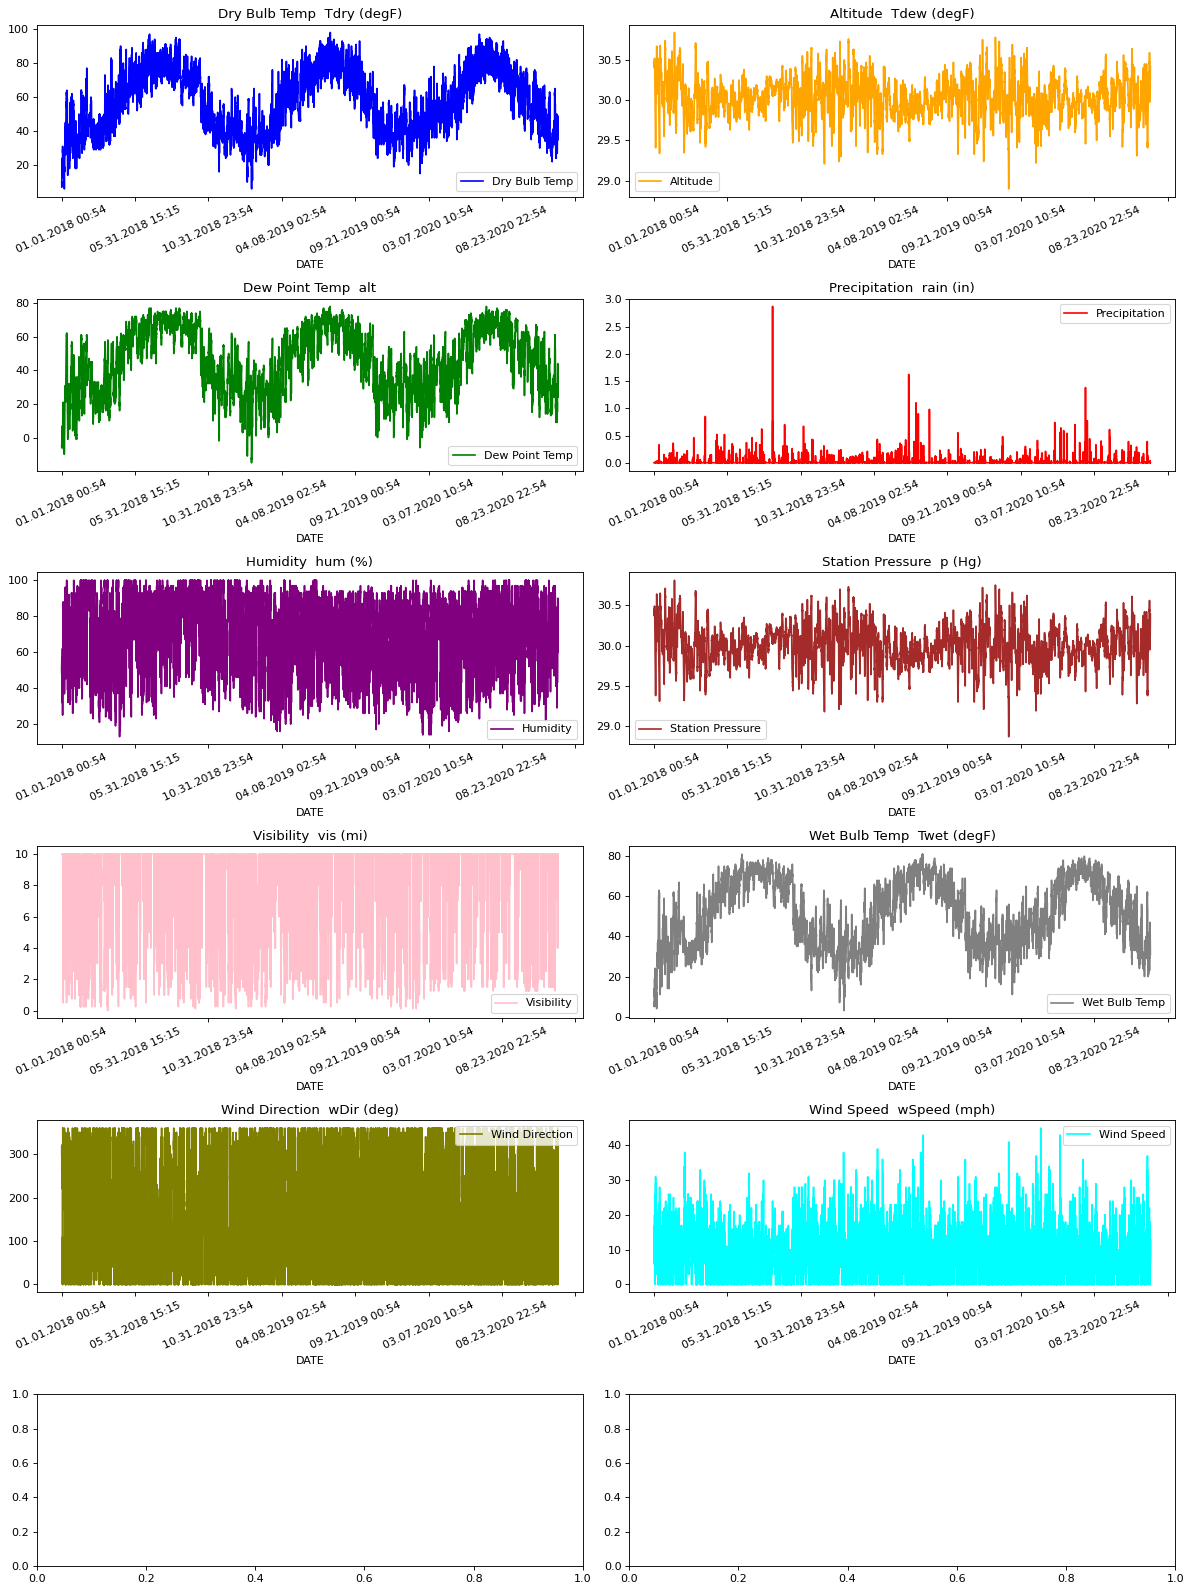

In [13]:
def show_raw_visualization(data):
    time_data = data["DATE"]
    fig, axes = plt.subplots(
        nrows= 6, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(keys)):
        key = keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title=keys[i] + "  " + labels[i],
            rot=25,
        )
        ax.legend([keys[i]])
    plt.tight_layout()

show_raw_visualization(df)

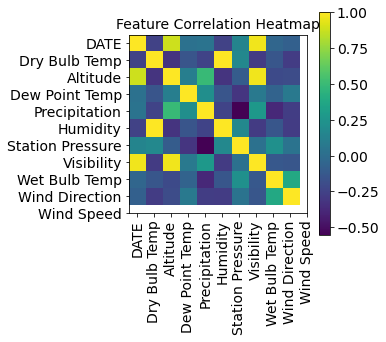

In [11]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()
    
show_heatmap(df)

In [14]:
usableFeatures = [keys[i] for i in [0,1,2,3,4,5,9]]
features = df[usableFeatures]
features.index = df["DATE"]
features.head()

,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Humidity,Station Pressure,Wind Speed
DATE,,,,,,,
01.01.2018 00:54,10.0,30.41,-5.0,0.0,50.0,30.38,6.0
01.01.2018 01:54,9.0,30.42,-5.0,0.0,52.0,30.39,7.0
01.01.2018 02:54,10.0,30.42,-6.0,0.0,48.0,30.39,8.0
01.01.2018 03:54,9.0,30.42,-6.0,0.0,50.0,30.39,7.0
01.01.2018 04:54,9.0,30.43,-6.0,0.0,50.0,30.40,9.0
